#Submission Pertama: Menyelesaikan Permasalahan Human Resources

- **Nama:** Nuraisah
- **Email:** nuraisahnura2004@gmail.com
- **ID Dicoding:** nuraisah_oxzV

#Business Understanding
Jaya Jaya Maju merupakan salah satu perusahaan multinasional yang telah berdiri sejak tahun 2000. Ia memiliki lebih dari 1000 karyawan yang tersebar di seluruh penjuru negeri.

Walaupun telah menjadi menjadi perusahaan yang cukup besar, Jaya Jaya Maju masih cukup kesulitan dalam mengelola karyawan. Hal ini berimbas tingginya attrition rate (rasio jumlah karyawan yang keluar dengan total karyawan keseluruhan) hingga lebih dari 10%.

Untuk mencegah hal ini semakin parah, manajer departemen HR ingin meminta bantuan Anda mengidentifikasi berbagai faktor yang mempengaruhi tingginya attrition rate tersebut. Selain itu, ia juga meminta Anda untuk membuat business dashboard untuk membantunya memonitori berbagai faktor tersebut.

#Persiapan
Sumber data : https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv

Menyiapkan library yang dibutuhkan

In [74]:
#Import Modul yang akan digunakan
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Menyiapkan data yang akan digunakan

In [75]:
url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv'
df = pd.read_csv(url)
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


#Data Understanding

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [77]:
print('total duplikasi data pada df:',df.duplicated().sum())

total duplikasi data pada df: 0


In [78]:
null_counts = df.isnull().sum()
print(null_counts)

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [79]:
df = df.dropna(subset=['Attrition'])

null_counts = df.isnull().sum()
print(null_counts)

EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [80]:
df.to_csv('cleaned.csv', index=False)

# EDA


Perbandingan Rata-rata Fitur antara Karyawan yang Mengundurkan Diri dan yang Tidak

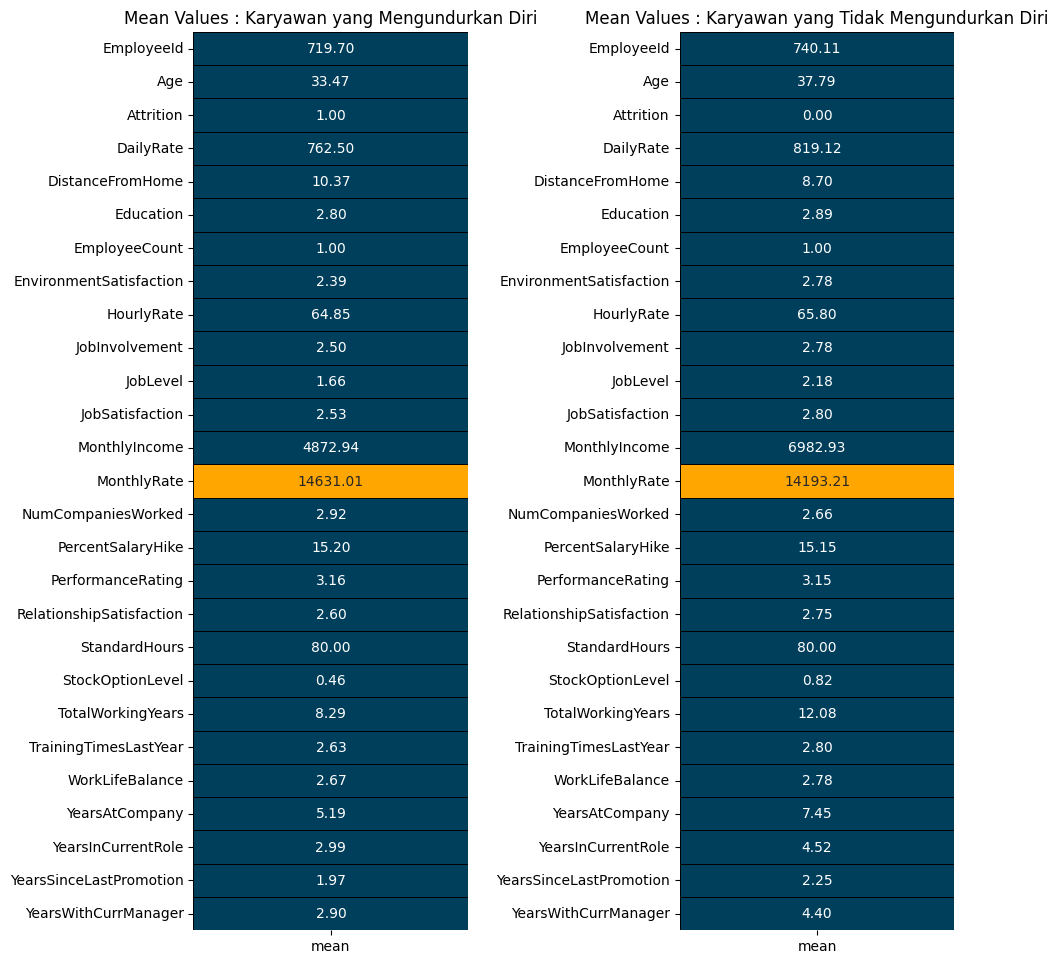

In [81]:
yes = df[df['Attrition'] == 1 ].describe().T
no = df[df['Attrition'] == 0 ].describe().T

colors = ['#003f5c', '#ffa600']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
plt.subplot(1, 2, 1)
sns.heatmap(yes[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('Mean Values : Karyawan yang Mengundurkan Diri')

plt.subplot(1, 2, 2)
sns.heatmap(no[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('Mean Values : Karyawan yang Tidak Mengundurkan Diri')

fig.tight_layout(pad=2)

plt.show()

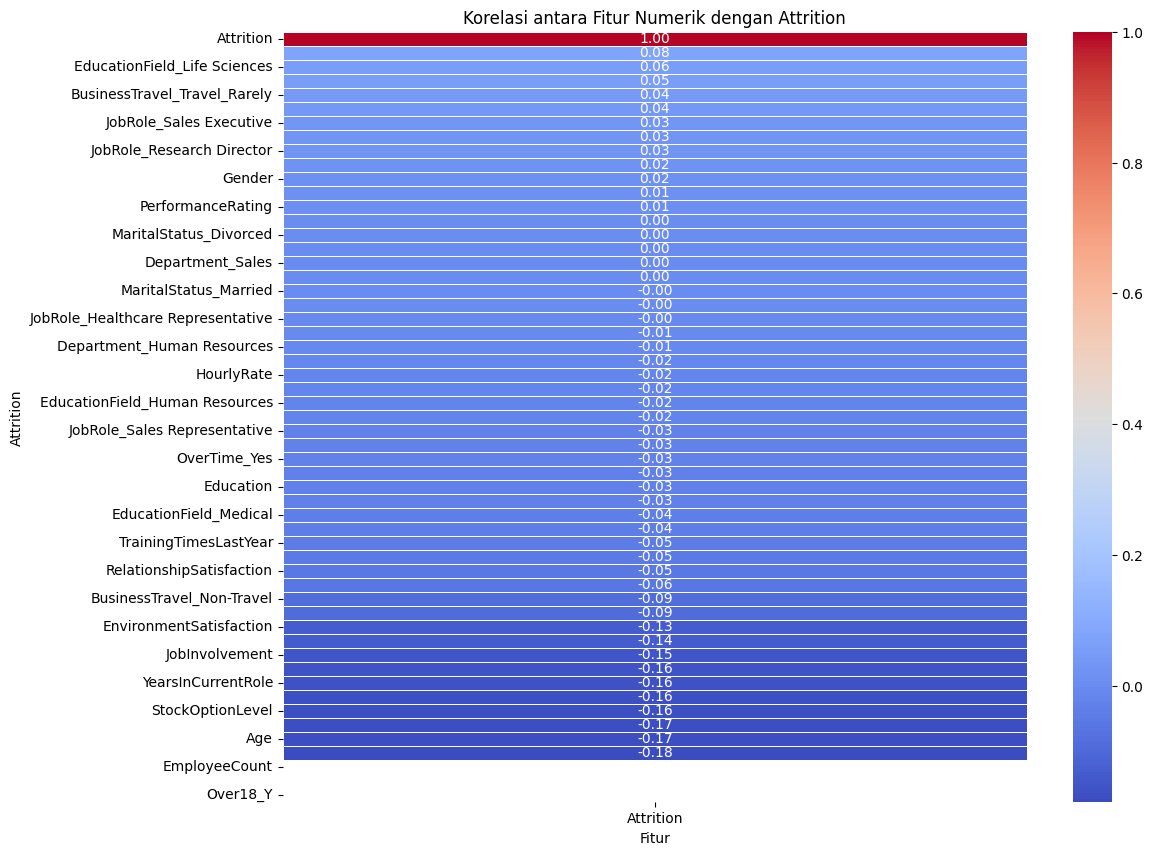

In [82]:
plt.figure(figsize=(12, 10))
sns.heatmap(attrition_corr.to_frame(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Korelasi antara Fitur Numerik dengan Attrition')
plt.xlabel('Fitur')
plt.ylabel('Attrition')
plt.show()

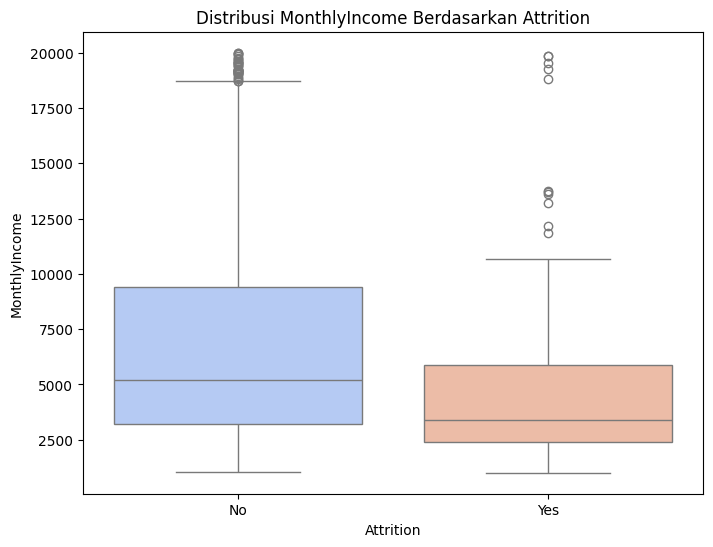

Distribusi MonthlyIncome Berdasarkan Attrition:
           count         mean          std     min     25%     50%     75%  \
Attrition                                                                    
0.0        879.0  6982.928328  4947.913587  1051.0  3202.5  5210.0  9407.5   
1.0        179.0  4872.938547  3807.243146  1009.0  2391.5  3388.0  5872.0   

               max  
Attrition           
0.0        19999.0  
1.0        19859.0  


In [83]:
df_attrition_subset = df[df['Attrition'].isin([0, 1])]

plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df_attrition_subset, hue='Attrition', palette='coolwarm', legend=False)
plt.title('Distribusi MonthlyIncome Berdasarkan Attrition')
plt.xlabel('Attrition')
plt.ylabel('MonthlyIncome')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.show()
print("Distribusi MonthlyIncome Berdasarkan Attrition:")
print(df_attrition_subset.groupby('Attrition')['MonthlyIncome'].describe())

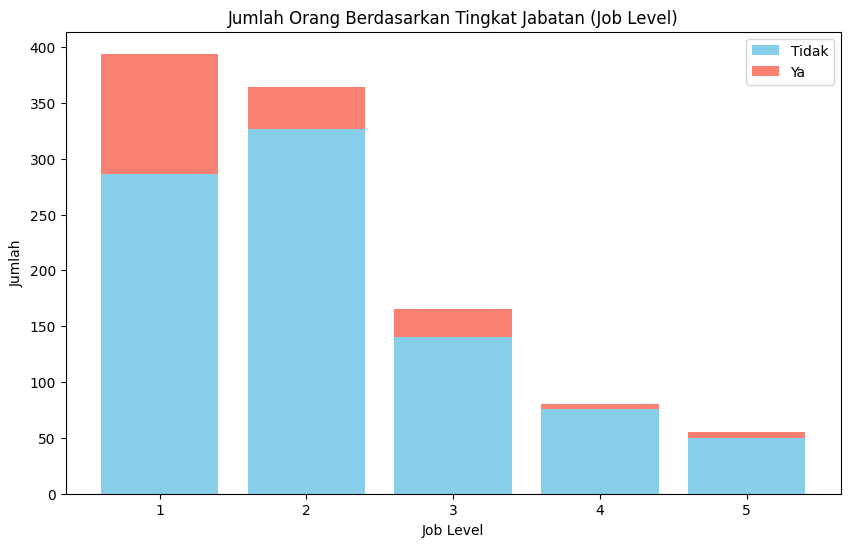

Distribusi jumlah orang berdasarkan tingkat jabatan (Job Level):
Attrition  0.0  1.0
JobLevel           
1          286  108
2          327   37
3          140   25
4           76    4
5           50    5


In [84]:
joblevel_att = df[df['Attrition'].isin([0, 1])].groupby(['JobLevel', 'Attrition']).size().unstack()

plt.figure(figsize=(10, 6))
plt.bar(joblevel_att.index, joblevel_att[0], color='skyblue', label='Tidak')
plt.bar(joblevel_att.index, joblevel_att[1], bottom=joblevel_att[0], color='salmon', label='Ya')

plt.xlabel('Job Level')
plt.ylabel('Jumlah')
plt.title('Jumlah Orang Berdasarkan Tingkat Jabatan (Job Level)')

plt.legend()
plt.show()

print("Distribusi jumlah orang berdasarkan tingkat jabatan (Job Level):")
print(joblevel_att)

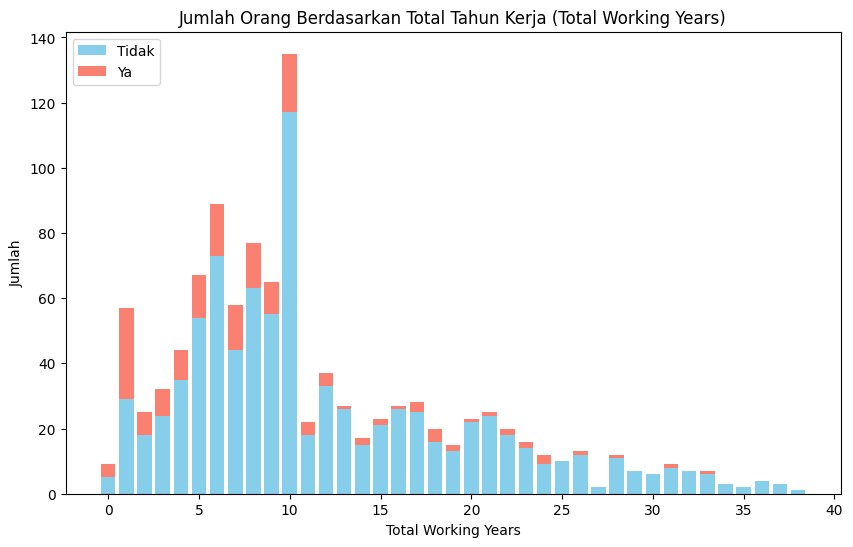

Distribusi jumlah orang berdasarkan total tahun kerja (Total Working Years):
Attrition            0.0   1.0
TotalWorkingYears             
0                    5.0   4.0
1                   29.0  28.0
2                   18.0   7.0
3                   24.0   8.0
4                   35.0   9.0
5                   54.0  13.0
6                   73.0  16.0
7                   44.0  14.0
8                   63.0  14.0
9                   55.0  10.0
10                 117.0  18.0
11                  18.0   4.0
12                  33.0   4.0
13                  26.0   1.0
14                  15.0   2.0
15                  21.0   2.0
16                  26.0   1.0
17                  25.0   3.0
18                  16.0   4.0
19                  13.0   2.0
20                  22.0   1.0
21                  24.0   1.0
22                  18.0   2.0
23                  14.0   2.0
24                   9.0   3.0
25                  10.0   NaN
26                  12.0   1.0
27                   2.0

In [85]:
total_years_att = df[df['Attrition'].isin([0, 1])].groupby(['TotalWorkingYears', 'Attrition']).size().unstack()

plt.figure(figsize=(10, 6))
plt.bar(total_years_att.index, total_years_att[0], color='skyblue', label='Tidak')
plt.bar(total_years_att.index, total_years_att[1], bottom=total_years_att[0], color='salmon', label='Ya')
plt.xlabel('Total Working Years')
plt.ylabel('Jumlah')
plt.title('Jumlah Orang Berdasarkan Total Tahun Kerja (Total Working Years)')

plt.legend()
plt.show()

print("Distribusi jumlah orang berdasarkan total tahun kerja (Total Working Years):")
print(total_years_att)

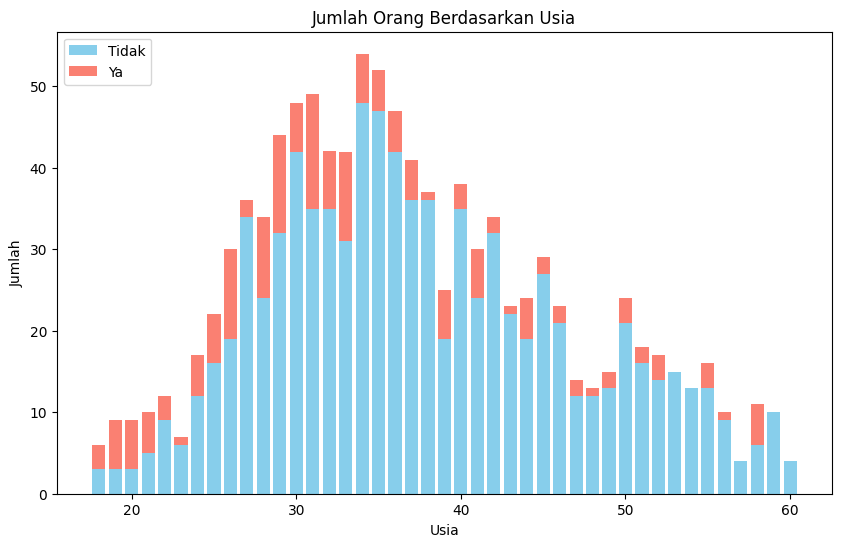

Distribusi jumlah orang berdasarkan usia:
Attrition   0.0   1.0
Age                  
18          3.0   3.0
19          3.0   6.0
20          3.0   6.0
21          5.0   5.0
22          9.0   3.0
23          6.0   1.0
24         12.0   5.0
25         16.0   6.0
26         19.0  11.0
27         34.0   2.0
28         24.0  10.0
29         32.0  12.0
30         42.0   6.0
31         35.0  14.0
32         35.0   7.0
33         31.0  11.0
34         48.0   6.0
35         47.0   5.0
36         42.0   5.0
37         36.0   5.0
38         36.0   1.0
39         19.0   6.0
40         35.0   3.0
41         24.0   6.0
42         32.0   2.0
43         22.0   1.0
44         19.0   5.0
45         27.0   2.0
46         21.0   2.0
47         12.0   2.0
48         12.0   1.0
49         13.0   2.0
50         21.0   3.0
51         16.0   2.0
52         14.0   3.0
53         15.0   NaN
54         13.0   NaN
55         13.0   3.0
56          9.0   1.0
57          4.0   NaN
58          6.0   5.0
59         1

In [86]:
age_att = df.groupby(['Age', 'Attrition']).size().unstack()

plt.figure(figsize=(10, 6))

plt.bar(age_att.index, age_att[0], color='skyblue', label='Tidak')
plt.bar(age_att.index, age_att[1], bottom=age_att[0], color='salmon', label='Ya')

plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.title('Jumlah Orang Berdasarkan Usia')

plt.legend()

plt.show()

# Print hasil plot
print("Distribusi jumlah orang berdasarkan usia:")
print(age_att)

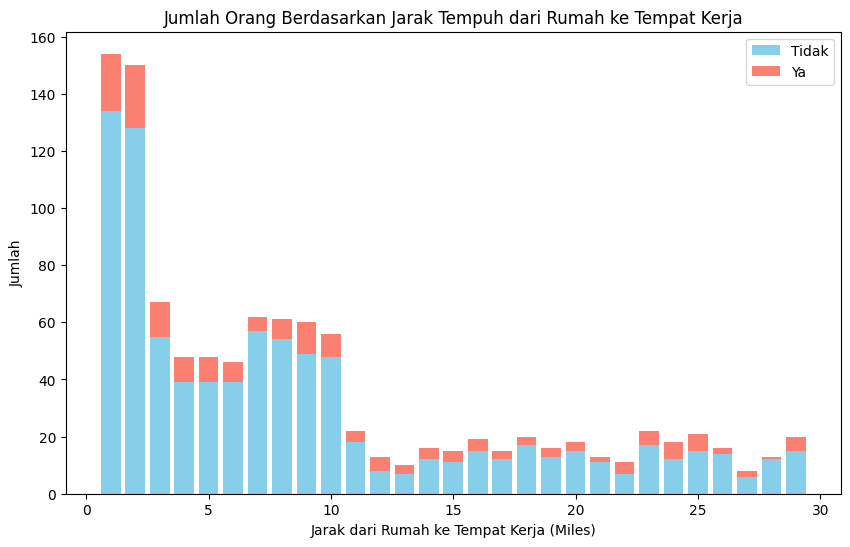

Distribusi jumlah orang berdasarkan jarak tempuh dari rumah ke tempat kerja:
Attrition         0.0  1.0
DistanceFromHome          
1                 134   20
2                 128   22
3                  55   12
4                  39    9
5                  39    9
6                  39    7
7                  57    5
8                  54    7
9                  49   11
10                 48    8
11                 18    4
12                  8    5
13                  7    3
14                 12    4
15                 11    4
16                 15    4
17                 12    3
18                 17    3
19                 13    3
20                 15    3
21                 11    2
22                  7    4
23                 17    5
24                 12    6
25                 15    6
26                 14    2
27                  6    2
28                 12    1
29                 15    5


In [87]:
distance_att = df.groupby(['DistanceFromHome', 'Attrition']).size().unstack()

plt.figure(figsize=(10, 6))

plt.bar(distance_att.index, distance_att[0], color='skyblue', label='Tidak')
plt.bar(distance_att.index, distance_att[1], bottom=distance_att[0], color='salmon', label='Ya')

plt.xlabel('Jarak dari Rumah ke Tempat Kerja (Miles)')
plt.ylabel('Jumlah')
plt.title('Jumlah Orang Berdasarkan Jarak Tempuh dari Rumah ke Tempat Kerja')

plt.legend()

plt.show()

# Print hasil plot
print("Distribusi jumlah orang berdasarkan jarak tempuh dari rumah ke tempat kerja:")
print(distance_att)

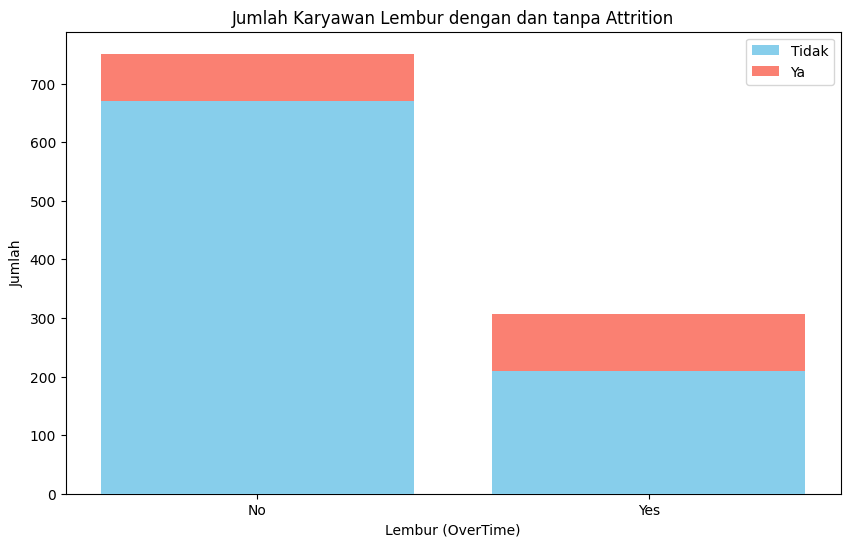

Distribusi jumlah orang berdasarkan lembur (OverTime):
Attrition  0.0  1.0
OverTime           
No         670   81
Yes        209   98


In [88]:
overtime_att = df[df['Attrition'].isin([0, 1])].groupby(['OverTime', 'Attrition']).size().unstack()

plt.figure(figsize=(10, 6))

plt.bar(overtime_att.index, overtime_att[0], color='skyblue', label='Tidak', zorder=3)
plt.bar(overtime_att.index, overtime_att[1], bottom=overtime_att[0], color='salmon', label='Ya', zorder=3)

plt.xlabel('Lembur (OverTime)')
plt.ylabel('Jumlah')
plt.title('Jumlah Karyawan Lembur dengan dan tanpa Attrition')

plt.legend()
plt.show()

# Print hasil plot
print("Distribusi jumlah orang berdasarkan lembur (OverTime):")
print(overtime_att)

#Data Preparation / Preprocessing

In [89]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [90]:
df[cat_cols]

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
1,Travel_Rarely,Research & Development,Medical,Female,Healthcare Representative,Married,Y,No
2,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,Yes
3,Travel_Frequently,Sales,Marketing,Female,Sales Executive,Married,Y,No
6,Travel_Rarely,Sales,Medical,Male,Sales Executive,Married,Y,Yes
7,Travel_Rarely,Research & Development,Medical,Male,Manager,Married,Y,Yes
...,...,...,...,...,...,...,...,...
1464,Non-Travel,Research & Development,Technical Degree,Male,Healthcare Representative,Single,Y,No
1465,Travel_Rarely,Research & Development,Life Sciences,Female,Manufacturing Director,Single,Y,Yes
1467,Travel_Rarely,Research & Development,Life Sciences,Female,Laboratory Technician,Married,Y,Yes
1468,Non-Travel,Research & Development,Life Sciences,Male,Research Scientist,Divorced,Y,No


In [91]:
df["Gender"] = df["Gender"].replace({"Female":0 ,"Male":1})

<ipython-input-91-f8345c2d86dc>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace({"Female":0 ,"Male":1})


In [92]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [93]:
encoded = encoder.fit_transform(df[['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']])

In [94]:
encoded_df = pd.DataFrame(encoded.toarray(),columns = encoder.get_feature_names_out())

In [95]:
df = pd.concat([df,encoded_df],axis=1)

In [96]:
df = df.drop(['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime'],axis =1)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1366 entries, 1 to 1056
Data columns (total 55 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EmployeeId                         1058 non-null   float64
 1   Age                                1058 non-null   float64
 2   Attrition                          1058 non-null   float64
 3   DailyRate                          1058 non-null   float64
 4   DistanceFromHome                   1058 non-null   float64
 5   Education                          1058 non-null   float64
 6   EmployeeCount                      1058 non-null   float64
 7   EnvironmentSatisfaction            1058 non-null   float64
 8   Gender                             1058 non-null   float64
 9   HourlyRate                         1058 non-null   float64
 10  JobInvolvement                     1058 non-null   float64
 11  JobLevel                           1058 non-null   float64
 1

In [98]:
attrition_corr = corr_matrix['Attrition'].sort_values(ascending=False)

# Print the sorted correlation values
print(attrition_corr.head(11))

Attrition                       1.000000
DistanceFromHome                0.078074
EducationField_Life Sciences    0.055635
JobRole_Research Scientist      0.054419
BusinessTravel_Travel_Rarely    0.043915
NumCompaniesWorked              0.037429
JobRole_Sales Executive         0.032580
OverTime_No                     0.028813
JobRole_Research Director       0.027476
MonthlyRate                     0.023299
Gender                          0.015887
Name: Attrition, dtype: float64


<Axes: title={'center': 'Correlation Plot'}>

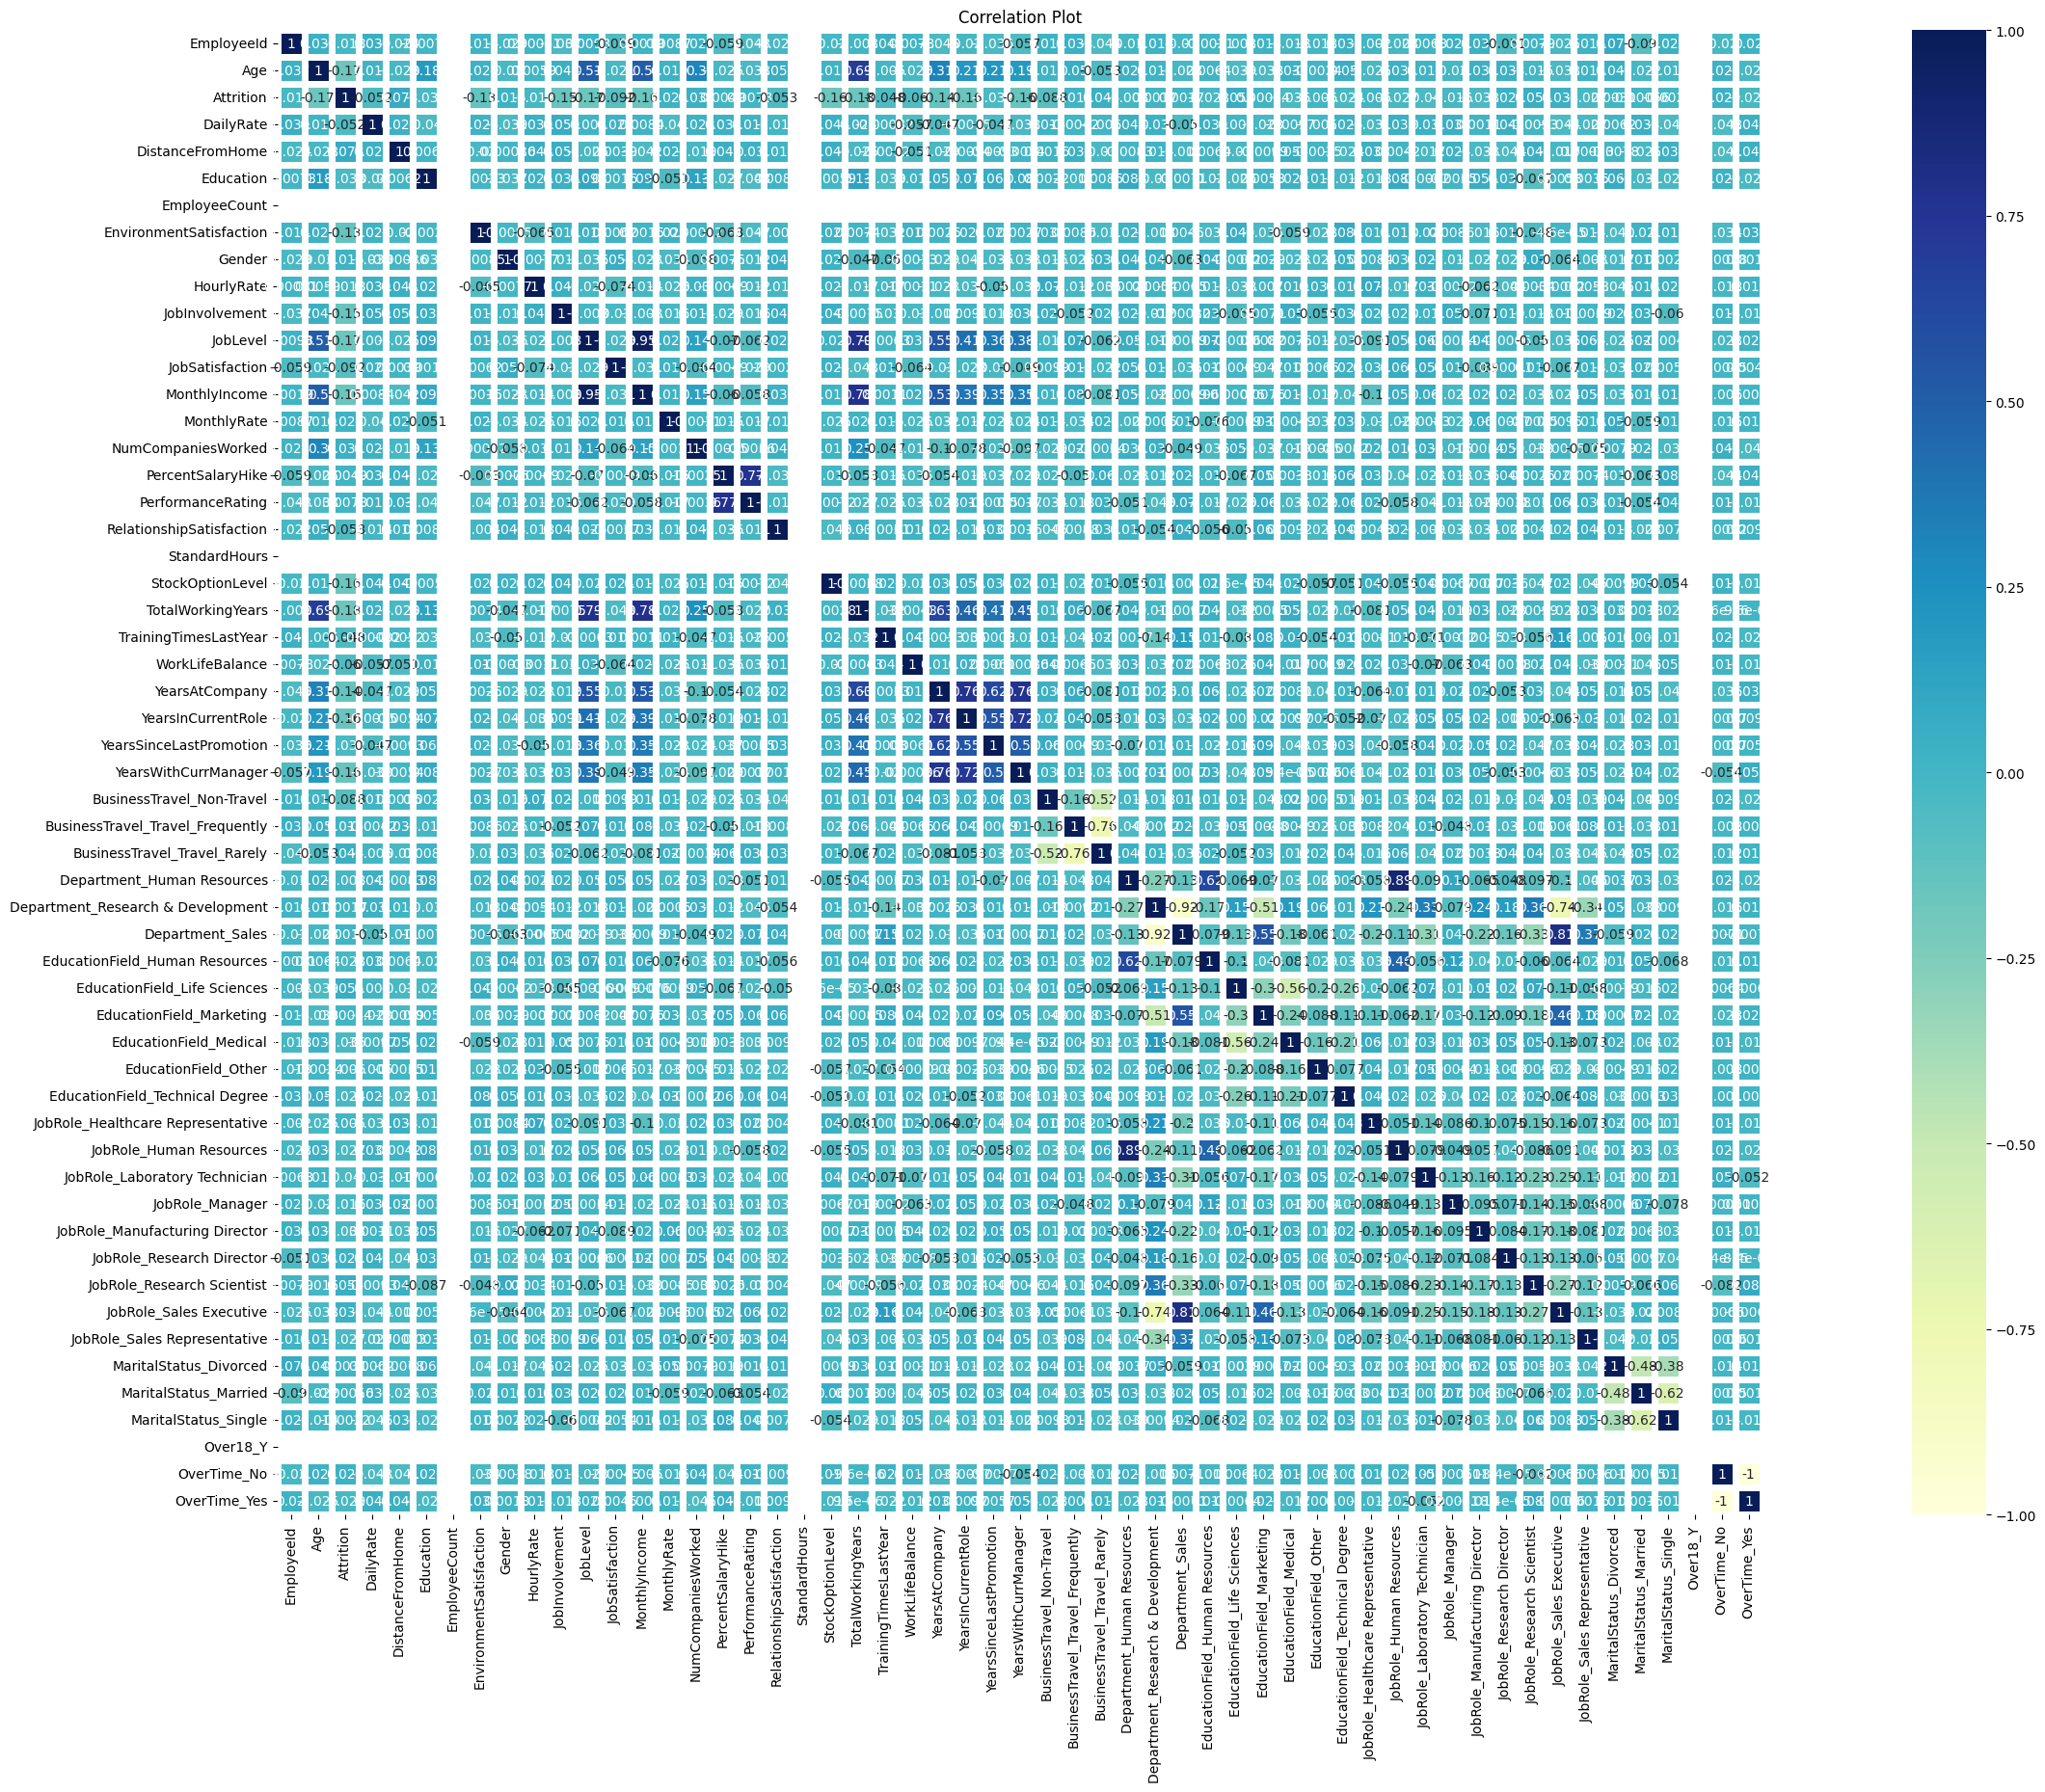

In [99]:
corr_matrix = df.corr()
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(df.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

In [100]:
df = pd.read_csv('/content/cleaned.csv')
df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
1,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
2,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
3,7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,1,...,3,80,3,6,2,2,4,3,0,2
4,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,1,...,4,80,1,24,2,3,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,1465,28,1.0,Non-Travel,1366,Research & Development,24,2,Technical Degree,1,...,1,80,0,10,2,2,10,7,1,9
1054,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,4,80,0,10,4,4,1,0,0,0
1055,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,4,80,0,1,4,2,1,1,0,0
1056,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,2,80,1,6,0,3,4,2,0,0


#Modeling

In [101]:
df = pd.read_csv('cleaned.csv')

In [102]:
drop_cols = ['EmployeeId', 'EmployeeCount', 'Over18', 'StandardHours']
df.drop(columns=drop_cols, inplace=True, errors='ignore')

In [103]:
df.dropna(inplace=True)

In [104]:
df['Attrition'] = df['Attrition'].astype(int)

In [105]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [106]:
X = pd.get_dummies(X, drop_first=True)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [108]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Evaluation

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       176
           1       0.80      0.33      0.47        36

    accuracy                           0.87       212
   macro avg       0.84      0.66      0.70       212
weighted avg       0.86      0.87      0.85       212



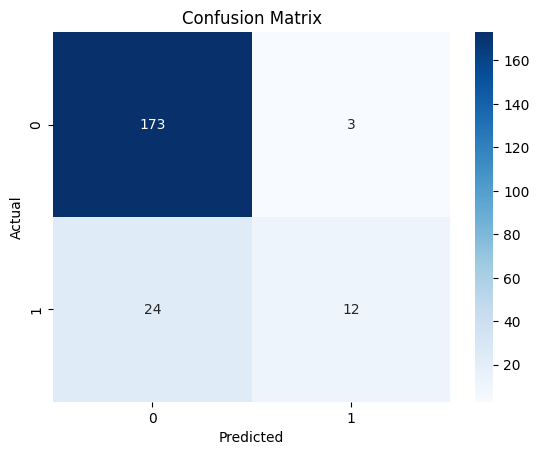

In [109]:
# Evaluasi Model
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [110]:
!pip freeze > requirements.txt